# 1. First steps

Important libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

df = pd.concat([X, y], axis=1)
df.to_csv("dataset.csv")

# 2. Getting acquainted with data

- Categorical features:
   - *age*
   - *trestbps* - resting blood pressure (in mm Hg on admission to the hospital)
   - *chol* - serum cholesterol in mg/dl
   - *thalach* - Maximum heart rate achieved
   - *oldpeak* -  ST depression induced by exercise relative to rest 
   - *ca* - Number of major vessels (0-3) colored by fluoroscopy

- Integer features
   - *sex* 
       - 0: female
       - 1: male
   - *cp* - chest pain
       - 1: typical angina
       - 2: atypical angina
       - 3: non-anginal pain
       - 4: asymptomatic
   - *fbs* - fasting blood sugar > 120 mg/dl
       - 0: False
       - 1: True
   - *restecg* - Resting electrocardiographic results
       - 0: Normal
       - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
   - *exang* - Exercise induced angina
       - 0: No
       - 1: Yes
   - *slope* - The slope of the peak exercise ST segment
       - 1: Up sloping
       - 2: Flat
       - 3: Down sloping
   - *thal*
       - 3: Normal
       - 6: Fixed defect
       - 7: Reversible defect
- Label
    - *num* - The final diagnosis of heart disease (angiographic disease status)

##### The information was taken from:
Nassif A. (et al). 2018. Machine Learning Classifications of Coronary Artery Disease. DOI: 10.1109/iSAI-NLP.2018.8692942

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
# checking the number of missing values in each feature
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [7]:
# number of samples per class
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

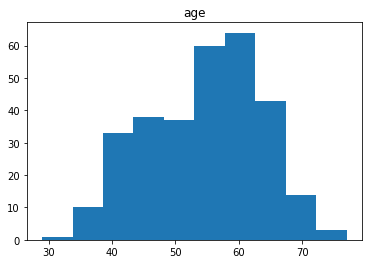

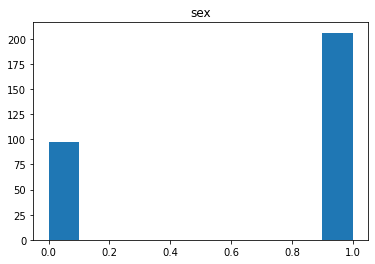

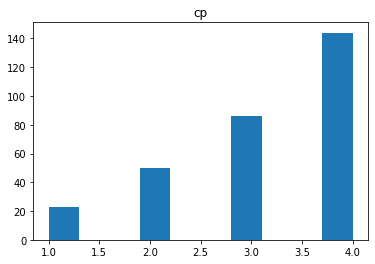

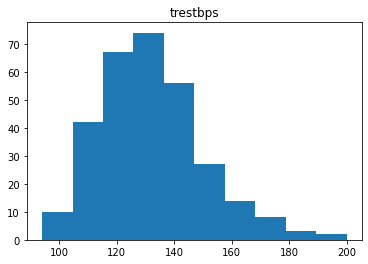

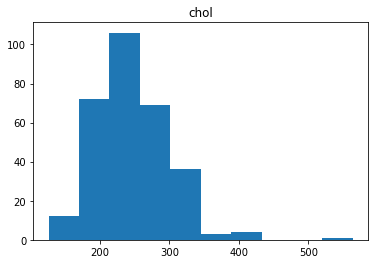

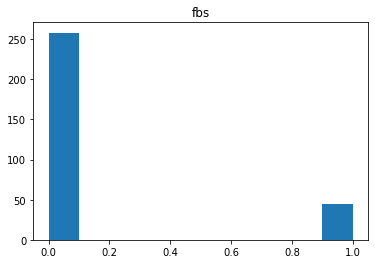

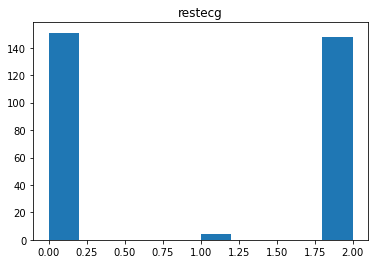

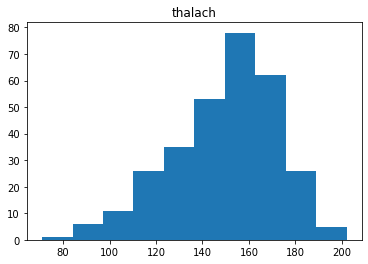

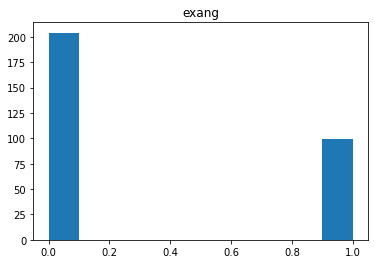

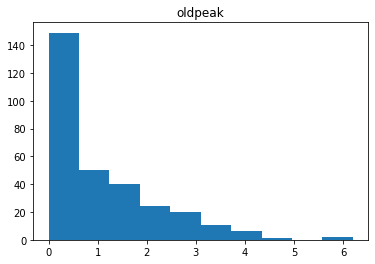

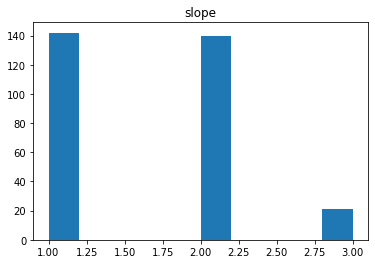

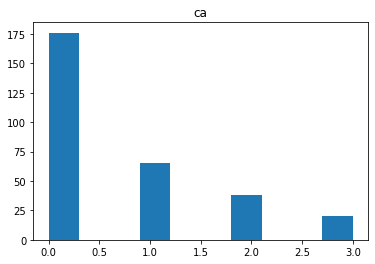

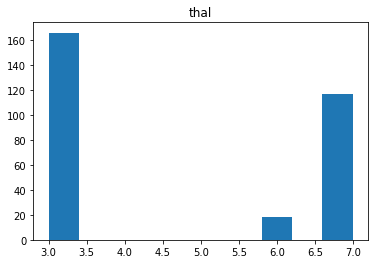

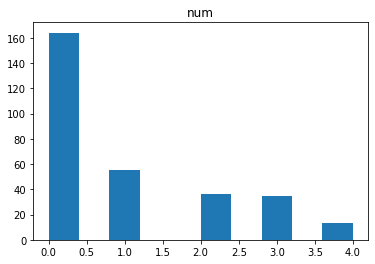

In [8]:
# histograms
for column in df.columns:
    plt.figure()
    plt.hist(df[column])
    plt.title(column)

# 3. Data cleaning

Data is already pretty clean, and there are only 6 NaN values, so we can drop those observations.

### 3.1 Dropping NaN values

In [9]:
df_filtered = df.dropna()

# re-checking the number of samples per class adfer dropping missing values
df_filtered.num.value_counts()

0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64

- As we can see, the NaN values were part of the classes with more observations, therefore droppins NaN values does not worsen the class imbalance problem.
- Since we only have 13 samples from the class with least amount of samples (y = 4), we cannot afford taking some samples as testing set, because we would loose valuable information. Therefore, we are going to work only with training and validation sets.

### 3.2 Splitting the data frame into features (X) and labels (y)

In [10]:
# splitting into features (X) and labels (y)
X = df_filtered.copy().drop(columns=['num'])
y = df_filtered.num.copy()

# 4. Data selection

### 4.1 Data selection by correlation elimination

We are using Spearman's correlation instead of Pearson's because practically all features don't have a normal distribution (as seen in the histograms above) and Spearman's is more robust to outliers.

Nassif et al. (2018; 10.1109/iSAI-NLP.2018.8692942) also applied correlation evaluation, but did not use Spearman's correlation.

In [11]:
corr = X.corr(method='spearman')
abs(corr)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,0.095407,0.132724,0.299610,0.183440,0.124634,0.148214,0.392571,0.088740,0.251928,0.173531,0.381848,0.126845
sex,0.095407,1.000000,0.041193,0.063575,0.153370,0.038850,0.033856,0.056308,0.143581,0.112289,0.027147,0.103088,0.375283
cp,0.132724,0.041193,1.000000,0.000526,0.073163,0.065440,0.092061,0.380677,0.424162,0.244908,0.204161,0.263578,0.310267
trestbps,0.299610,0.063575,0.000526,1.000000,0.139193,0.155462,0.145812,0.046782,0.052445,0.155770,0.089026,0.078291,0.111381
chol,0.183440,0.153370,0.073163,0.139193,1.000000,0.016965,0.162501,0.034758,0.083200,0.024128,0.003445,0.134837,0.003786
fbs,0.124634,0.038850,0.065440,0.155462,0.016965,1.000000,0.068813,0.010158,0.000893,0.026181,0.031339,0.143631,0.054634
restecg,0.148214,0.033856,0.092061,0.145812,0.162501,0.068813,1.000000,0.105222,0.081891,0.104377,0.139604,0.127669,0.015262
thalach,0.392571,0.056308,0.380677,0.046782,0.034758,0.010158,0.105222,1.000000,0.404741,0.436650,0.438043,0.289906,0.291965
exang,0.088740,0.143581,0.424162,0.052445,0.083200,0.000893,0.081891,0.404741,1.000000,0.295863,0.266624,0.181963,0.324950
oldpeak,0.251928,0.112289,0.244908,0.155770,0.024128,0.026181,0.104377,0.436650,0.295863,1.000000,0.593634,0.265438,0.356842


Creating a function that selects features according correlation. The arguments of the function (1) the dataframe, (2) the correlation method, and (3) the correlation threshold for feature elimination.

In [12]:
def Corr_selection(df, corr_method, threshold):
    """
    This function selects the features to be eliminate according to 
    a correlation threshold
    
    corr_matrix: has to be a pandas data frame n-by-n,
    with n features as indices and columns.
    threshold: has to by a int or float from 0 to 1
    """
    corr_matrix = X.corr(method=corr_method)
    # covert corr_matrix to absolute values
    corr_matrix = np.array(abs(corr_matrix))
    # all features available
    features = np.array(df.columns)
    
    # list of features to eliminate
    to_eliminate = []
    
    # runs all lines
    for i in range(len(features)):
        # runs all columns
        for j in range(len(features)):
            
            if corr_matrix[i,j] > threshold and corr_matrix[i,j] != 1: 
                
                if np.mean(corr_matrix[i,:]) > np.mean(corr_matrix[:,j]):
                    to_eliminate.append(features[i])
                else:
                    to_eliminate.append(features[j])
    
    to_eliminate = np.unique(to_eliminate)
    selected_features = list( features[~np.isin(features, to_eliminate)] )
    
    return selected_features

In [13]:
corr_selected_features = Corr_selection(X, 'spearman', 0.2)
print("Remaining:", corr_selected_features)

Remaining: ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg']


### 4.2 Data selection by information gain

Creating a function that selects features according to Mutual Information Gain. 

References:
- Nassif et al. (2018; 10.1109/iSAI-NLP.2018.8692942)
- Guhanesvar. *Feature Selection Based on Mutual Information Gain for Classification and Regression*. Medium. June 26, 2021.

In [14]:
def InfoGain_selection(X, y, n_features):
    """
    This function selects n_features according that have the greatest 
    mutual information classification
    """
    from sklearn.feature_selection import mutual_info_classif
    importance = mutual_info_classif(X, y)
    importance = pd.Series(data = importance, index = X.columns)
    importance = importance.sort_values(ascending=False)

    selected_features = list(importance.iloc[:n_features].index)
    
    return importance, selected_features

Text(0, 0.5, 'Mutual Information Gain')

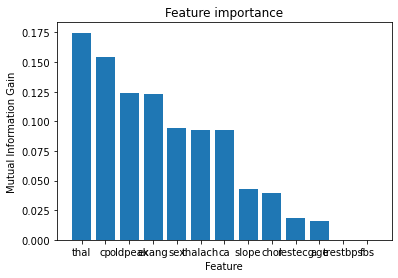

In [15]:
importance, InfoGain_selected_features = InfoGain_selection(X, y, 6)

plt.figure()
plt.bar(importance.index, importance)
plt.title("Feature importance")
plt.xlabel("Feature")
plt.ylabel("Mutual Information Gain")

# 5. Creating models

Here the goal is to classify the final diagnosis of heart disease according to [0, 1, 2, 3, 4], which is opposite to what literature does: they reduce the classification to binary.

### 5.1 Decision Tree

With a Decision Tree algorithm there is no need to standardize the data, these algorithms are not influenced by variance.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

##### 5.1.1 ... with correlation feature selection

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X[corr_selected_features], y, 
                                                    test_size=0.20, random_state=42)

classifier = tree.DecisionTreeClassifier(max_depth = 2)
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predict)

print("Decision Tree model, correlation selection")
print("Accuracy:",accuracy)

Decision Tree model, correlation selection
Accuracy: 0.6166666666666667


##### 5.1.2 ... with multual information feature selection

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X[InfoGain_selected_features], y, 
                                                    test_size=0.20, random_state=42)

classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predict)

print("Decision Tree model, InfoGain selection")
print("Accuracy:",accuracy)

Decision Tree model, InfoGain selection
Accuracy: 0.65
